<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
import requests       # To send HTTP requests and get the webpage content
from bs4 import BeautifulSoup  # To parse the HTML content
import pandas as pd   # To handle data and save it as CSV

Download the webpage at the url


In [3]:
# your code goes here
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Webpage downloaded successfully!")
    webpage_content = response.text  # This contains the HTML content of the page
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")

Webpage downloaded successfully!


Create a soup object


In [4]:
# your code goes here
# Assuming webpage_content contains the HTML of the page
soup = BeautifulSoup(webpage_content, 'html.parser')

print("Soup object created successfully!")

Soup object created successfully!


Scrape the `Language name` and `annual average salary`.


In [9]:
# your code goes here
# Find the first table on the page (assuming the data is there)
table = soup.find('table')

# Get all rows in the table except the header
rows = table.find_all('tr')[1:]  # Skip header row

languages = []
salaries = []

for row in rows:
    cells = row.find_all('td')
    if len(cells) >= 2:
        language = cells[1].text.strip()        # Language name is in second column
        salary = cells[3].text.strip()          # Annual average salary in fourth column
        languages.append(language)
        salaries.append(salary)

# Check the scraped data
for lang, sal in zip(languages, salaries):
    print(f"{lang}: {sal}")

Python: $114,383
Java: $101,013
R: $92,037
Javascript: $110,981
Swift: $130,801
C++: $113,865
C#: $88,726
PHP: $84,727
SQL: $84,793
Go: $94,082


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the web page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
response = requests.get(url)

if response.status_code == 200:
    print("Webpage downloaded successfully!")
    webpage_content = response.text
else:
    raise Exception(f"Failed to load page, status code: {response.status_code}")

# Step 2: Create BeautifulSoup object
soup = BeautifulSoup(webpage_content, 'html.parser')
print("Soup object created successfully!")

# Step 3: Locate the table
table = soup.find('table')

# Step 4: Extract rows
languages = []
salaries = []

for row in table.find_all('tr')[1:]:  # Skip header
    cols = row.find_all('td')
    if len(cols) >= 4:
        language = cols[1].text.strip() # 2nd column is the language
        salary = cols[3].text.strip()  # 4th column is 'Average Annual Salary'
        languages.append(language)
        salaries.append(salary)

# Step 5: Display results
for lang, sal in zip(languages, salaries):
    print(f"{lang}: {sal}")

Webpage downloaded successfully!
Soup object created successfully!
Python: $114,383
Java: $101,013
R: $92,037
Javascript: $110,981
Swift: $130,801
C++: $113,865
C#: $88,726
PHP: $84,727
SQL: $84,793
Go: $94,082


Save the scrapped data into a file named *popular-languages.csv*


In [10]:
# your code goes here
# Create a DataFrame from the scraped data
data = {
    'Language': languages,
    'Average Annual Salary': salaries
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('popular-languages.csv', index=False)

print("Data saved to popular-languages.csv successfully!")

Data saved to popular-languages.csv successfully!


In [12]:
# Read the CSV file into a DataFrame
df = pd.read_csv('popular-languages.csv')

# Display the first few rows of the DataFrame
print(df.head(10))

     Language Average Annual Salary
0      Python              $114,383
1        Java              $101,013
2           R               $92,037
3  Javascript              $110,981
4       Swift              $130,801
5         C++              $113,865
6          C#               $88,726
7         PHP               $84,727
8         SQL               $84,793
9          Go               $94,082


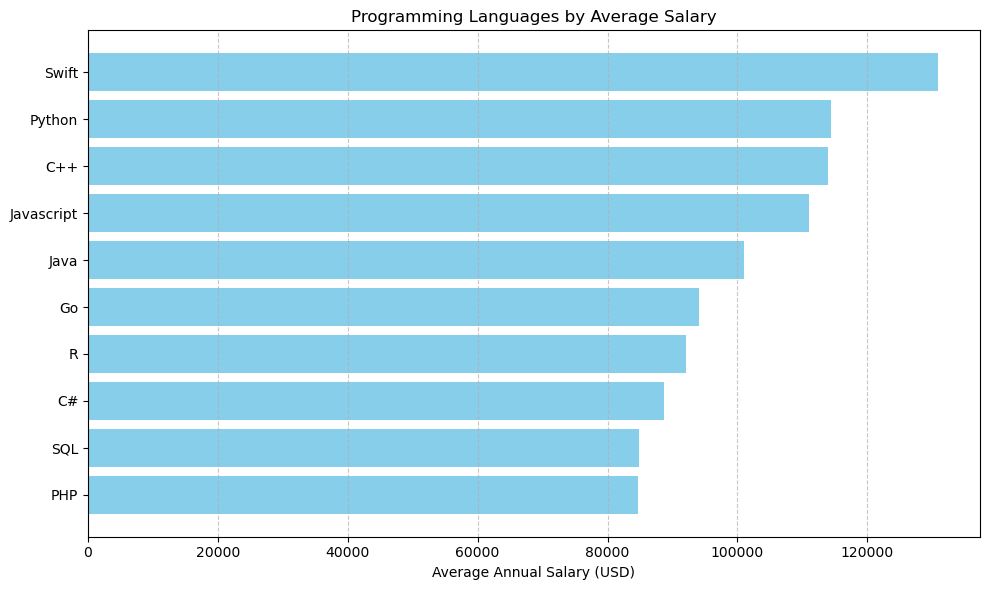

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
df = pd.read_csv('popular-languages.csv')

# Step 2: Clean the 'Average Annual Salary' column
# Remove $ and commas, convert to float
df['Salary_numeric'] = df['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(float)

# Step 3: Sort the data by salary in descending order
df_sorted = df.sort_values(by='Salary_numeric', ascending=False)

# Step 4: Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Language'], df_sorted['Salary_numeric'], color='skyblue')
plt.xlabel('Average Annual Salary (USD)')
plt.title('Programming Languages by Average Salary')
plt.gca().invert_yaxis()  # Highest salary on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
